In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [265]:
dados_ml= pd.read_excel('dados_ml_balanceado.xlsx', sheet_name= 'Plan1')

In [458]:
dados_exp = pd.read_excel('dados_exp.xlsx', sheet_name= 'Plan1')

In [440]:
dados_exp.head()

,Idempresacorreto,idfunc,150M,Tipinstitu,origcapital,capitaberto,setor,operação no Brasil,fx_tempregados,rotgeral,...,cltfx,fxtempempr,fx_cargo,fx_salario,fx_localtrab,fx_escol,catSexo,cat_retnaemp,categ_futnaemp,fx_desemp
0,9,72355,2,Empresa privada,Nacional,Sim,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,De 21% a 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Administrativo,"De R$ 954,01 a R$ 1908,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Remuneração e Benefícios,2-Entre 1 e 3 anos,A_M
1,74,224974,1,Empresa privada,Nacional,Não,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,Acima de 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Vendedor,"De R$ 954,01 a R$ 1908,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Satisfação com o Trabalho,2-Entre 1 e 3 anos,A_M
2,165,118267,1,Empresa privada,Nacional,Não,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,Acima de 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Vendedor,"De R$ 954,01 a R$ 1908,00",Loja / Atendimento ao consumidor / Agência / C...,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Remuneração e Benefícios,2-Entre 1 e 3 anos,A_M
3,209,15784,1,Empresa privada,Nacional,Não,Serviços,Até 10 anos,Até 500 empregados,Acima de 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Supervisor / Coordenador,"De R$ 3816,01 a R$ 5724,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Relacionamentos,2-Entre 1 e 3 anos,A_M
4,26,228084,2,Empresa privada,Multinacional,Sim,Agronegócio,Acima de 30 anos,De 1501 a 5000 empregados,De 11% a 20% do quadro de funcionários,...,Sim,De 1 a 2 anos incompletos,Supervisor / Coordenador,"De R$ 11448,01 a R$ 15264,00",Fábrica / Produção / Agrícola / Obra / Laborat...,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Prestígio Organizacional,2-Entre 1 e 3 anos,A_M


# Definição de variáveis

In [270]:
y = dados_ml['fx_desemp']

In [269]:
x1 = dados_ml[['150m', 'tipinstitu','genz','origcapital', 'capitaberto', 'setor', 'anos de operação no Brasil', 'totempr', 'prevquadro', 'rotgeral', 'clt', 'tempempr', 'cargo', 'fxsalarial', 'loctrab', 'sexo', 'retnaemp', 'escolaridade', 'meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr', 'rot_vol', 'categ_futnaemp']]

# Análise exploratória

In [117]:
explorat1= dados_exp.pivot_table(values= ['emp.brand','com.int','part.aut','sust.diver','rel.int','carr','pro.org','qvt','educ.corp','lid','recomp','estr.obj'],index='cat_retnaemp',columns='fx_desemp')

In [437]:
explorat2= dados_exp.pivot_table(values= ['emp.brand','com.int','part.aut','sust.diver','rel.int','carr','pro.org','qvt','educ.corp','lid','recomp','estr.obj'],index='categ_futnaemp',columns='fx_desemp')

In [459]:
explorat3= dados_exp.pivot_table(values= ['emp.brand','com.int','part.aut','sust.diver','rel.int','carr','pro.org','qvt','educ.corp','lid','recomp','estr.obj'],index='fx_rotatividadevol',columns='fx_desemp')

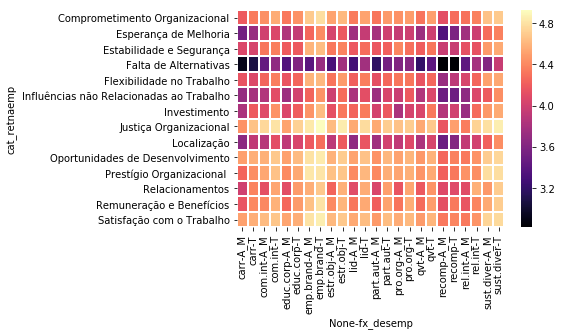

In [120]:
sns.heatmap(explorat1,cmap='magma',linecolor='white',linewidths=1)

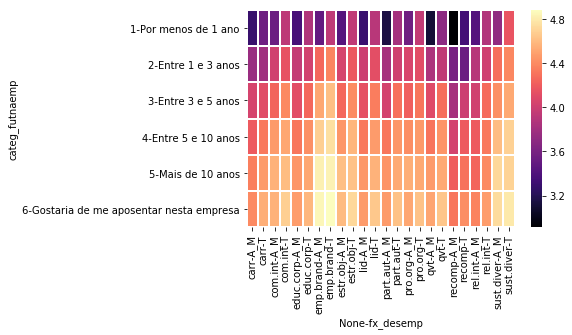

In [436]:
sns.heatmap(explorat2,cmap='magma',linecolor='white',linewidths=1)

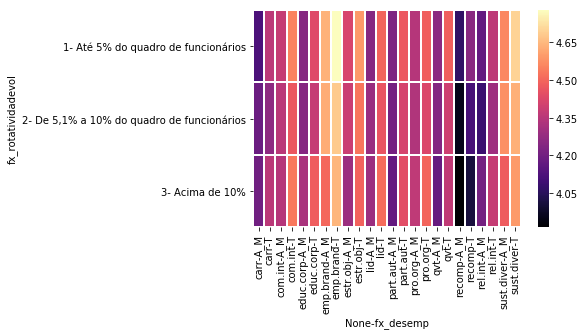

In [460]:
sns.heatmap(explorat3,cmap='magma',linecolor='white',linewidths=1)

# Modelo para prever desempenho (Regressão Logística)

In [419]:
from sklearn.model_selection import train_test_split

In [420]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, 
                                                    random_state=101)

In [421]:
from sklearn.linear_model import LogisticRegression

In [422]:
logmodel = LogisticRegression()
logmodel.fit(x1_train,y_train)

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [423]:
predictions = logmodel.predict(x1_test)

In [424]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [425]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.75      0.70      0.73       258
           2       0.70      0.75      0.73       240

   micro avg       0.73      0.73      0.73       498
   macro avg       0.73      0.73      0.73       498
weighted avg       0.73      0.73      0.73       498



In [426]:
taxa_acerto = accuracy_score(y_test, predictions)

In [427]:
taxa_acerto

0.7269076305220884

In [428]:
predictions = logmodel.predict_proba(x1_test)

In [429]:
naot= ['Não é talento']
simt= ['É talento']

In [433]:
predictions = pd.DataFrame(predictions, columns= (naot, simt)).round(2)

In [434]:

final= pd.concat([x1_test.reset_index(), y_test.reset_index(), predictions], axis=1)

In [435]:
final.head()

,index,150m,tipinstitu,genz,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,medc,mlid,mrec,mestr,rot_vol,categ_futnaemp,index,fx_desemp,"(Não é talento,)","(É talento,)"
0,1847,1,1,1,2,1,5,35,2,2,...,4.571429,4.7,4.25,4.25,1.969873,5,1847,2,0.18,0.82
1,355,1,1,3,2,1,5,40,2,1,...,3.571429,3.9,3.25,4.00,3.888025,6,355,1,0.36,0.64
2,2087,1,2,1,1,1,4,60,2,1,...,5.000000,5.0,5.00,5.00,5.258900,5,2087,2,0.24,0.76
3,2023,1,2,3,2,1,5,126,2,2,...,3.000000,2.9,3.25,2.25,13.274336,3,2023,2,0.73,0.27
4,59,1,2,3,2,1,5,27,1,3,...,4.857143,5.0,5.00,5.00,5.533597,3,59,1,0.16,0.84


In [356]:
logmodel.coef_.round

<function ndarray.round>

In [357]:
betas= ['betas']
coef = pd.DataFrame(data=logmodel.coef_, index= betas, columns= x1.columns)

In [354]:
coef= coef.T
coef.sort_values(['betas'], ascending= False).round(3)

,betas
origcapital,0.701
mqvt,0.396
mci,0.381
mlid,0.320
mpa,0.278
clt,0.237
fxsalarial,0.100
escolaridade,0.047
categ_futnaemp,0.029
retnaemp,0.008


In [358]:
coef.to_excel('coef_teste.xls', sheet_name= 'sheet1')

# Modelo para prever desempenho (Randon Forest)

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
rfc_pred = rfc.predict(x1_test)

In [275]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.88      0.62      0.73       258
           2       0.69      0.91      0.79       240

   micro avg       0.76      0.76      0.76       498
   macro avg       0.79      0.77      0.76       498
weighted avg       0.79      0.76      0.76       498



In [276]:
taxaforest_acerto = accuracy_score(y_test, rfc_pred)

In [277]:
taxaforest_acerto

0.7610441767068273

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [320]:
gp= ['grupo previsto']
rfc_predbd = pd.DataFrame(rfc_pred, columns= gp)

In [321]:
y_testbd= pd.DataFrame(y_test)

In [322]:
finalforest= pd.concat([x1_test.reset_index(), y_testbd.reset_index(), rfc_predbd], axis=1)

In [323]:
finalforest.head()

,index,150m,tipinstitu,genz,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,mqvt,medc,mlid,mrec,mestr,rot_vol,categ_futnaemp,index,fx_desemp,grupo previsto
0,1847,1,1,1,2,1,5,35,2,2,...,4.625,4.571429,4.7,4.25,4.25,1.969873,5,1847,2,2
1,355,1,1,3,2,1,5,40,2,1,...,3.000,3.571429,3.9,3.25,4.00,3.888025,6,355,1,2
2,2087,1,2,1,1,1,4,60,2,1,...,5.000,5.000000,5.0,5.00,5.00,5.258900,5,2087,2,2
3,2023,1,2,3,2,1,5,126,2,2,...,3.250,3.000000,2.9,3.25,2.25,13.274336,3,2023,2,1
4,59,1,2,3,2,1,5,27,1,3,...,4.750,4.857143,5.0,5.00,5.00,5.533597,3,59,1,2


In [328]:
forest = ExtraTreesClassifier()
forest.fit(x1_train, y_train)
importanciasarr = forest.feature_importances_

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [329]:
importancias= ['importâncias']
importanciastab= pd.DataFrame(data= importanciasarr, index= x1.columns, columns= importancias).round(3)

In [336]:
importanciastab.sort_values(['importâncias'], ascending= False)

,importâncias
totempr,0.180
capitaberto,0.047
anos de operação no Brasil,0.047
rot_vol,0.039
setor,0.031
fxsalarial,0.029
rotgeral,0.029
medc,0.028
mqvt,0.028
retnaemp,0.027


In [331]:
importanciastab.to_excel('importancias_teste.xls', sheet_name= 'sheet1')

In [332]:
finalforest.to_excel('finalforest_teste.xls', sheet_name= 'sheet1')